In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [5]:
from dtutil.sqltools import query_to_dataframe, get_cursor_from_url
os.environ['DATABASE_URL'] = 'postgres:///awrdata'
print('Using database: {}'.format(os.environ['DATABASE_URL']))
cursor = get_cursor_from_url()

Using database: postgres:///awrdata


In [2]:
query = """
select m.id as m_id, m.name as m_name, m.test_case, m.current_sequence as cseq,
       m.median, m.upper, m.lower, m.meas_type,
       t.value, t.passed, t.build, t.sequence as seq, t.id as t_id from pertest_test as t
    inner join pertest_metric as m on t.metric_id = m.id
where metric_id in (74637, 74638)
order by t.build
"""
df = query_to_dataframe(cursor, query)
df

In [3]:
df.head()

,id,name,test_case,median,value,upper,lower,meas_type,value.1,passed
0,76892,AxPerf:D_Factor$T,Andrew_FICA_Coupler_3_Example_clean1@CopiedArt...,3.007995,NaN,1,1,MED_ABS,3.08471,1
1,76892,AxPerf:D_Factor$T,Andrew_FICA_Coupler_3_Example_clean1@CopiedArt...,3.007995,NaN,1,1,MED_ABS,3.09262,1
2,76892,AxPerf:D_Factor$T,Andrew_FICA_Coupler_3_Example_clean1@CopiedArt...,3.007995,NaN,1,1,MED_ABS,2.96430,1
3,76892,AxPerf:D_Factor$T,Andrew_FICA_Coupler_3_Example_clean1@CopiedArt...,3.007995,NaN,1,1,MED_ABS,3.01289,1
4,76892,AxPerf:D_Factor$T,Andrew_FICA_Coupler_3_Example_clean1@CopiedArt...,3.007995,NaN,1,1,MED_ABS,2.93170,1


In [87]:
def plot_df(df):
    num_id = len(df['m_id'].unique())
    
    fig, axes = plt.subplots(nrows=num_id, ncols=1, figsize=(10, num_id*3))
    i = 0
    for id, items in df.groupby('m_id'):
        items = items.sort_index(by='build')
        l = len(items)
        if l > 2:
            f = items.iloc[0]
            med = f['median']
            if f.meas_type == 'MED_ABS':
                lower = med - 1
                upper = med + 1
            else:
                lower = med * 0.9
                upper = med * 1.1
            ax = axes[i]
            items['value'].plot(ax=ax, marker='o', label=items.iloc[0].name)
            ax.axhspan(lower, upper, facecolor='yellow', alpha=0.5)
            ax.set_title(f.m_name)
            ax.set_xticklabels(items.build)
        i += 1

In [28]:
for id, items in df.groupby('id'):
    l = len(items)
    if l > 2:
        f = items.iloc[0]
        m = items[items.passed == 1]['value.1'].median()
        s = items['value.1'].std()
        print('{:4.1f} {:6.3f} {:4.1f}% {:30s}{}'.format(m, s, 100.*s/m, f['name'], f['id']))

 8.1  0.298  3.7% DesEnv:Time(s)$T              72769
15.6  0.607  3.9% DesEnv:Time(s)$T              72773
 4.8  0.291  6.1% DesEnv:Time(s)$T              72789
 1.1  0.163 15.1% DesEnv:Time(s)$T              72820
 4.9  0.586 11.9% DesEnv:Time(s)$T              72821
17.9  0.877  4.9% DesEnv:Time(s)$T              72852
34.4  0.945  2.7% DesEnv:Time(s)$T              72867
 2.4  0.443 18.4% AxPerf:Total_Exe$T            74628
 2.4  0.443 18.5% AxPerf:All$T                  74637
 1.4  0.433 32.0% AxPerf:Grns_Funct$TC          74638
15.9  0.437  2.7% AxPerf:Total_Exe$T            76378
15.9  0.438  2.8% AxPerf:All$T                  76387
 3.1  0.151  4.8% AxPerf:Total_Exe$T            76603
22.1  0.404  1.8% AxPerf:Total_Exe$T            76878
22.1  0.404  1.8% AxPerf:All$T                  76887
14.6  0.330  2.3% AxPerf:Init_Total$T           76890
 3.0  0.226  7.5% AxPerf:D_Factor$T             76892
11.0  0.202  1.8% AxPerf:Total_Exe$T            76978
11.0  0.202  1.8% AxPerf:All

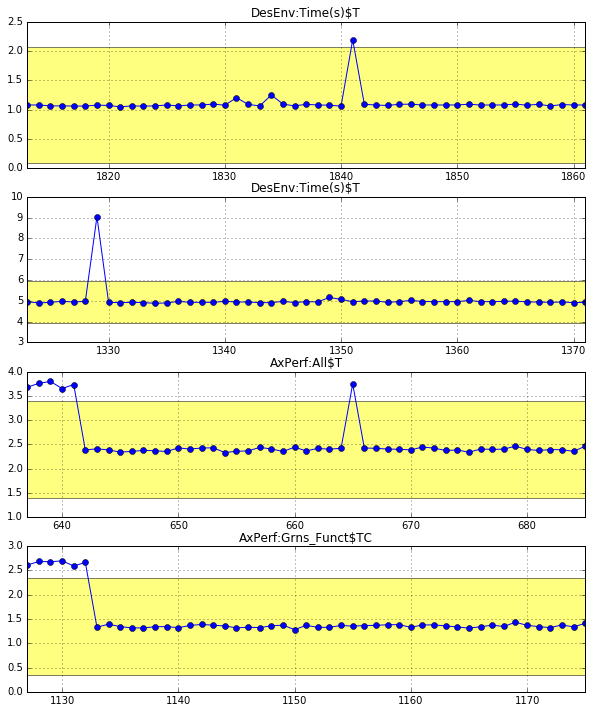

In [29]:
plot_df(df[df.id.isin([72820,72821,74638,74637])])

In [94]:
def boxplot_df(bdf):
    num_id = len(bdf['m_id'].unique())
    fig, axes = plt.subplots(1, num_id)
    fig.set_size_inches(12,8)
    i=0
    for id, items in bdf.groupby('m_id'):
        f = items.iloc[0]
        items.boxplot(column='value', ax=axes[i], grid=False)
        axes[i].set_xlabel(f['m_name'])
        axes[i].set_ylabel('Values')
        axes[i].set_title(f['m_id'])
        i += 1
    plt.show()

,m_id,m_name,test_case,cseq,median,upper,lower,meas_type,value,passed,build,seq,t_id
0,74638,AxPerf:Grns_Funct$TC,interior_ports_Axx_same@A4b,0,1.35333,1,1,MED_ABS,1.41294,1,8600.05,0,1298595
1,74637,AxPerf:All$T,interior_ports_Axx_same@A4b,1,3.73250,1,1,MED_ABS,2.46178,1,8600.05,0,1298594
2,74637,AxPerf:All$T,interior_ports_Axx_same@A4b,1,3.73250,1,1,MED_ABS,2.35514,1,8600.07,0,1316298
3,74638,AxPerf:Grns_Funct$TC,interior_ports_Axx_same@A4b,0,1.35333,1,1,MED_ABS,1.33637,1,8600.07,0,1316299
4,74637,AxPerf:All$T,interior_ports_Axx_same@A4b,1,3.73250,1,1,MED_ABS,2.38952,1,8600.08,0,1326334
5,74638,AxPerf:Grns_Funct$TC,interior_ports_Axx_same@A4b,0,1.35333,1,1,MED_ABS,1.37916,1,8600.08,0,1326335
6,74638,AxPerf:Grns_Funct$TC,interior_ports_Axx_same@A4b,0,1.35333,1,1,MED_ABS,1.32267,1,8601.01,0,1344152
7,74637,AxPerf:All$T,interior_ports_Axx_same@A4b,1,3.73250,1,1,MED_ABS,2.39107,1,8601.01,0,1344157
8,74638,AxPerf:Grns_Funct$TC,interior_ports_Axx_same@A4b,0,1.35333,1,1,MED_ABS,1.34218,1,8601.03,0,1358022
9,74637,AxPerf:All$T,interior_ports_Axx_same@A4b,1,3.73250,1,1,MED_ABS,2.37440,1,8601.03,0,1358027


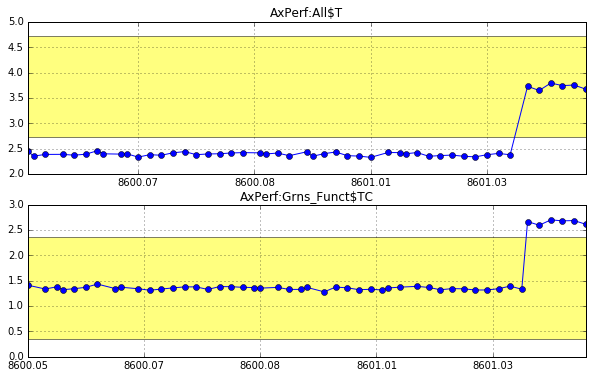

In [88]:
plot_df(qdf)

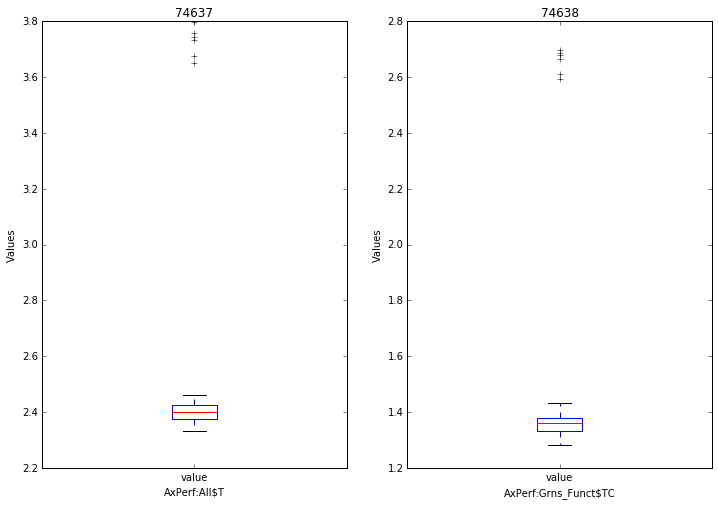

In [95]:
boxplot_df(qdf)